In [410]:
import numpy as np
import os
import cPickle
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../simulation')
import sim_functions as sim

In [411]:

data_dir='../../data/radio/sim/'

mag=2.03
average_density = 6.5e-4 #in g/cm^3#atmc.get_density(average_zenith, average_xmax) * 1e-3  # in kg/m^3
p0=0.250524463912
p1=-2.95290494

p0_=0.239
p1_=-3.13

In [412]:
def read_file(filename):
    
    infile=open(filename,'r')
    info=cPickle.load(infile)
    infile.close()
    
    
    em_energy=info['em_energy']
    energy=info['energy']
    zenith=info['zenith']
    azimuth=info['azimuth']
    xmax=info['xmax']
    alpha=info['alpha']
    Erad=info['Erad']
    Erad_ce=info['Erad_ce']
    Erad_gm=info['Erad_gm']
    density=info['density']
    density2=info['density2']
    event=info['event']
    #Erad=Erad+Erad*.11-Erad*0.0336
    #Erad_ce=Erad_ce+Erad_ce*.11-Erad_ce*0.0336
    #Erad_gm=Erad_gm+Erad_gm*.01#-Erad_gm*0.0336

    return em_energy,energy,zenith,azimuth,xmax,alpha,Erad,Erad_gm,Erad_ce,density,density2,event

In [413]:
em_energy_P,energy_P,zenith_P,azimuth_P,xmax_P,alpha_P,Erad_P,Erad_gm_P,Erad_ce_P,density_P,density2_P,event_P=read_file(data_dir+'compiled_sims_proton_debug2.dat')
em_energy_Fe,energy_Fe,zenith_Fe,azimuth_Fe,xmax_Fe,alpha_Fe,Erad_Fe,Erad_gm_Fe,Erad_ce_Fe,density_Fe,density2_Fe,event_Fe=read_file(data_dir+'compiled_sims_iron_debug2.dat')


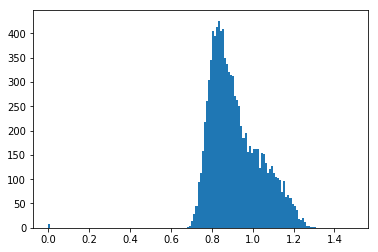

In [414]:
bins=np.arange(0,1.5,0.01)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.hist(density_P*1e3,bins=bins)

plt.show()
plt.close()

In [419]:
y_plt_P=np.sin(alpha_P)*np.sqrt(Erad_ce_P/Erad_gm_P)*mag**0.9
x_plt_P=density_P*1e3

y_plt_P1=np.sin(alpha_P)*np.sqrt(Erad_ce_P/Erad_gm_P)*mag**0.9
x_plt_P1=density_P*1e3*np.cos(zenith_P)

y_plt_P2=np.sin(alpha_P)*np.sqrt(Erad_ce_P/Erad_gm_P)*mag**0.9
x_plt_P2=density2_P*1e3

y_plt_Fe=np.sin(alpha_Fe)*np.sqrt(Erad_ce_Fe/Erad_gm_Fe)*mag**0.9
x_plt_Fe=density_Fe*1e3

y_plt_Fe1=np.sin(alpha_Fe)*np.sqrt(Erad_ce_Fe/Erad_gm_Fe)*mag**0.9
x_plt_Fe1=density_Fe*1e3*np.cos(zenith_Fe)

y_plt_Fe2=np.sin(alpha_Fe)*np.sqrt(Erad_ce_Fe/Erad_gm_Fe)*mag**0.9
x_plt_Fe2=density2_Fe*1e3



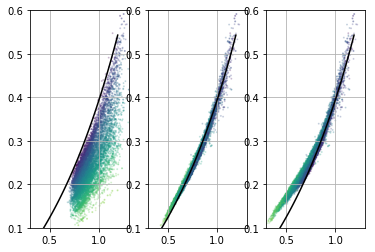

In [418]:
x_test=np.arange(0,1.2,0.01)
y_test=0.43*(np.exp(1.11*(x_test-0.65)))-.24


fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

start=0
stop=9000


sc = ax1.scatter(x_plt_P,y_plt_P, alpha=0.2,s=1,c=zenith_P) 
sc = ax2.scatter(x_plt_P1,y_plt_P1, alpha=0.2,s=1,c=zenith_P) 
sc = ax3.scatter(x_plt_P2,y_plt_P2, alpha=0.2,s=1,c=zenith_P) 

ax1.plot(x_test,y_test,color='black')
ax2.plot(x_test,y_test,color='black')
ax3.plot(x_test,y_test,color='black')

ax1.set_xlim([0.3,1.3])
ax2.set_xlim([0.3,1.3])
ax3.set_xlim([0.3,1.3])
ax1.set_ylim([0.1,.6])
ax2.set_ylim([0.1,.6])
ax3.set_ylim([0.1,.6])
ax1.grid()
ax2.grid()
ax3.grid()

plt.show()
plt.close()

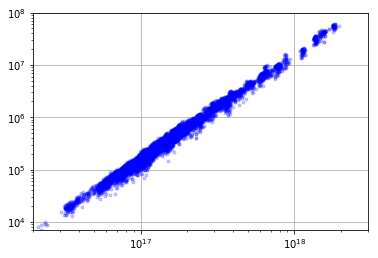

In [363]:
bins=np.arange(0,1,0.01)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.plot(em_energy_P,(Erad_P/np.sin(alpha_P)**2)/mag**1.8,'.',color='blue',alpha=0.2)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.axis([2e16,3e18,7e3,1e8])
ax1.grid()

plt.show()
plt.close()